
## Problem Statement
We intend to build a model which can effectively predict housing sale prices in Ames, US.\
We further intend to identify features that contribute to changes in housing price so as to equip real estate agents with the knowledge to better advise their clients and improve their sales margin.

## Background 
<img src = https://miro.medium.com/max/800/1*M5NSBj1N1k8gJ-3KrcZh0Q.jpeg
svg.png width = "500" height = "500" >

Ames is a small city in the state of Iowa in the United States.\
It is home to Iowa State University, which is the largest university in the state.\
The Ames housing dataset examines features of houses sold in Ames during the 2006–10 timeframe. 

**Contents**
1. Importing libraries
2. Importing dataset
3. Data cleaning, feature engineering and data visualization
* Data cleaning
    * Handling ordinal columns
    * Impute values for LotFrontage (dealing with missing values)
    * Dropping columns with <5% unique values
    * Dropping rows where =<5% data is null

* Feature engineering
    * Transforming data
        * Creating TotalBaths column, dropping other Bath columns
        * Creating Age column
    
* Data cleaning pt 2.
    * Checking for intercorrelated features for numerical data and dropping columns with high colinearity with other features but low correlation to SalePrice
    * Dropping outliers beyond 4std from continuous variables based on skew
    * Dummifying nominal columns
    * Dropping ID and PID column
    * Save new csv

## 1. Import Libraries

In [1]:
#Data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

## 2. Import Dataset

In [2]:
#Import data and get familiar with dataset

ames_train = pd.read_csv('/Users/vjfychan/Downloads/train.csv')
ames_train.shape
ames_train.info()
ames_train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051,1721.000000,2051.000000,2051,140,2051,2051,...,2051.000000,2051.000000,9,400,65,2051.000000,2051.000000,2051.000000,2051,2051.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,NaN,4,4,5,NaN,NaN,NaN,9,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,NaN
freq,NaN,NaN,NaN,1598,NaN,NaN,2044,85,1295,1843,...,NaN,NaN,4,227,56,NaN,NaN,NaN,1781,NaN
mean,1474.033642,7.135900e+08,57.008776,NaN,69.055200,10065.208191,NaN,NaN,NaN,NaN,...,16.511458,2.397855,NaN,NaN,NaN,51.574354,6.219893,2007.775719,NaN,181469.701609
std,843.980841,1.886918e+08,42.824223,NaN,23.260653,6742.488909,NaN,NaN,NaN,NaN,...,57.374204,37.782570,NaN,NaN,NaN,573.393985,2.744736,1.312014,NaN,79258.659352
min,1.000000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,12789.000000
25%,753.500000,5.284581e+08,20.000000,NaN,58.000000,7500.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,129825.000000
50%,1486.000000,5.354532e+08,50.000000,NaN,68.000000,9430.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,162500.000000
75%,2198.000000,9.071801e+08,70.000000,NaN,80.000000,11513.500000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,214000.000000


Notice how in .info( ), it shows that there are surprisingly few nulls in the numeric data.\
The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).


## 3. Data cleaning, feature engineering and data visualization
#### (In Order)

#### Data cleaning
* Handling ordinal columns
* Impute values for LotFrontage (dealing with missing values)
* Dropping columns with <5% unique values
* Dropping rows where =<5% data is null
* Feature engineering

#### Transforming data
* Creating TotalBaths column, dropping other Bath columns
* Creating Age column

#### Data cleaning pt 2.

* Checking for intercorrelated features for numerical data and dropping columns with high colinearity with other features but low correlation to SalePrice
* Dropping outliers beyond 4std from continuous variables based on skew
* Dummifying nominal columns
* Dropping ID and PID column

In [3]:
#Change column names so no spacing
ames_train.columns = ames_train.columns.str.replace(" ","")


count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

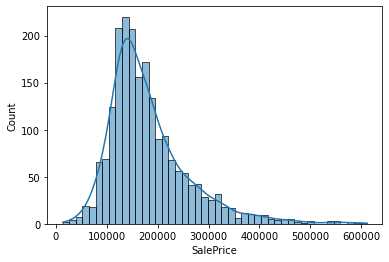

In [4]:
#Setting the Id column to be the index
ames_train.set_index('Id').sort_index()

#Let's find out more about Sale Prices: Mean, Max, Min
print(ames_train['SalePrice'].describe())
sns.histplot(ames_train['SalePrice'],kde=True)

#We can see from the plot that the distribution is right-skewed.

In [5]:
#Describe each column in data except for columns with object data type.

ames_train[ames_train.select_dtypes(exclude='object').columns].describe()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
#Check percentage of missing values in each column and dtype of each column

total = ames_train.isnull().sum().sort_values(ascending=False)
percent = (ames_train.isnull().sum() / ames_train.isnull().count()*100).sort_values(ascending=False) #No. of missing values/total entries
missing_data = pd.concat([total, percent,ames_train.dtypes], axis=1, keys=['Total', 'Percent','Type'])
print(missing_data.head(10))



              Total    Percent     Type
PoolQC         2042  99.561190   object
MiscFeature    1986  96.830814   object
Alley          1911  93.174061   object
Fence          1651  80.497318   object
FireplaceQu    1000  48.756704   object
LotFrontage     330  16.089712  float64
GarageFinish    114   5.558264   object
GarageQual      114   5.558264   object
GarageYrBlt     114   5.558264  float64
GarageCond      114   5.558264   object


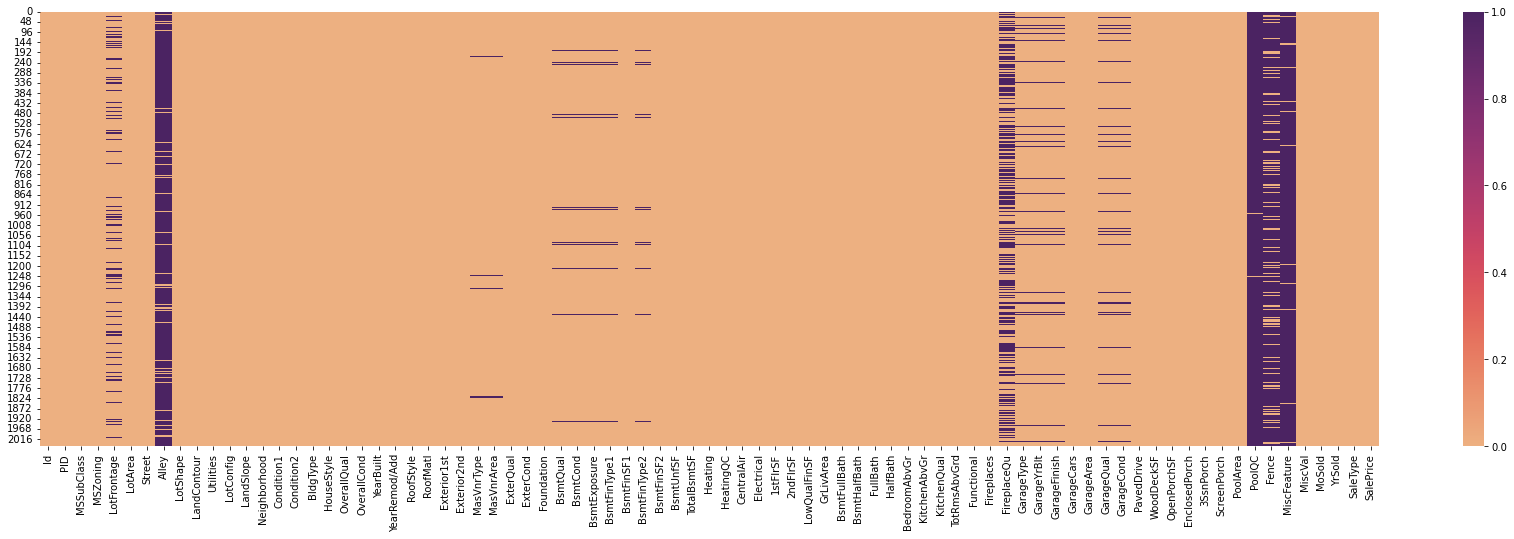

In [7]:
#Plotting a heatmap to visualise the null values in all columns
plt.figure(figsize=(30,8));
sns.heatmap(ames_train.isnull(), cmap='flare');

In [8]:
#Looking at how the mean housing prices are associated with all categorical variables.
def mean_prices_categorical_var(df):
    for i in df:
        if df[i].dtype == 'O': 
            print(df.groupby(i, as_index=True)['SalePrice'].mean().sort_values(ascending=False) )  
            print("\n")
    
print(mean_prices_categorical_var(ames_train))

MSZoning
FV         218618.316832
RL         191235.164581
RH         148859.571429
RM         129119.142405
C (all)     78010.894737
I (all)     57625.000000
A (agr)     47300.000000
Name: SalePrice, dtype: float64


Street
Pave    181793.565558
Grvl     86901.428571
Name: SalePrice, dtype: float64


Alley
Pave    174534.709091
Grvl    120835.635294
Name: SalePrice, dtype: float64


LotShape
IR2    233954.745455
IR1    211848.670520
IR3    193182.222222
Reg    162925.812355
Name: SalePrice, dtype: float64


LandContour
HLS    262353.376471
Low    199313.116279
Lvl    178998.564840
Bnk    142868.775000
Name: SalePrice, dtype: float64


Utilities
AllPub    181551.602245
NoSeWa    137500.000000
NoSewr     57625.000000
Name: SalePrice, dtype: float64


LotConfig
CulDSac    230744.358779
FR3        198600.000000
Corner     180629.591954
Inside     177537.014637
FR2        174703.600000
Name: SalePrice, dtype: float64


LandSlope
Mod    204639.465909
Sev    194598.000000
Gtl    180358.47670

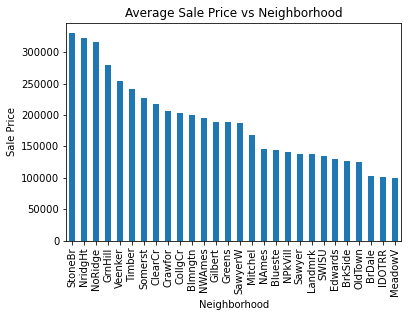

In [9]:
#Explore ames neighborhood - which area is most expensive?
ames_neighborhood = ames_train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False)
ames_neighborhood.plot(kind = 'bar')
plt.ylabel('Sale Price')
plt.title('Average Sale Price vs Neighborhood')
plt.show()

We can see from the above bar chart that the top 3 most expensive neighbourhoods are:
1) Stone Brook\
2) Northridge Heights\
3) Northridge

And the least expensive neighbourhood is Meadow Village.

This shows that neighbourhood is an important factor in house prices.

#### <u>Handling ordinal columns</u>
Refering to the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) provided, we handle the missing values in ordinal columns first.\
All null values to be replaced with the integer "0" while the other subcategories within each column were ordered in ascending order\
e.g Quality columns were ordered as follows : "Ex" = 5, "Gd" = 4, "TA" = 3, "Fa"= 2, "Po"= 1.\
The idea is to transform these categorical variables into numeric variables.

In [10]:
#There are 23 ordinal columns in our dataset
#Create functions to make them numeric
# LotShape,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,
# BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,
# KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,
# PoolQC,Fence

#OverallQual and OverallCond already ordered from 10-1

In [11]:
#Lot Shape
#Reg: Regular
#IR1: Slightly irregular
#IR2: Moderately Irregular
#IR3: Irregular

lotshape_conversion={'Reg':4,'IR1':3,'IR2':2,'IR3':1}
ames_train['LotShape']=ames_train['LotShape'].map(lotshape_conversion)

ames_train

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,3,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,3,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,4,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,4,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,3,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,3,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,3,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,4,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,4,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [12]:
#Quailty columns, 10 columns.

quality_conversion = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
ames_train['ExterQual'] = ames_train['ExterQual'].map(quality_conversion)
ames_train['ExterCond']= ames_train['ExterCond'].map(quality_conversion)
ames_train['BsmtQual']= ames_train['BsmtQual'].map(quality_conversion)
ames_train['BsmtCond']= ames_train['BsmtCond'].map(quality_conversion)
ames_train['HeatingQC']= ames_train['HeatingQC'].map(quality_conversion)
ames_train['KitchenQual']= ames_train['KitchenQual'].map(quality_conversion)
ames_train['FireplaceQu']= ames_train['FireplaceQu'].map(quality_conversion)
ames_train['GarageQual']= ames_train['GarageQual'].map(quality_conversion)
ames_train['GarageCond']= ames_train['GarageCond'].map(quality_conversion)
ames_train['PoolQC']= ames_train['PoolQC'].map(quality_conversion)


In [13]:
#Basement Finish, 2 columns

basement_conversion={'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LWQ':2,'Unf':1}

ames_train['BsmtFinType1']=ames_train['BsmtFinType1'].map(basement_conversion)
ames_train['BsmtFinType2']=ames_train['BsmtFinType2'].map(basement_conversion)

In [14]:
#Basement Exposure
#Gd: Good Exposure
#Av: Average Exposure (split levels or foyers typically score average or above)	
#Mn: Mimimum Exposure
#No: No Exposure

bsmtexp_conversion={'Gd':4,'Av':3,'Mn':2,'No':1}
ames_train['BsmtExposure']=ames_train['BsmtExposure'].map(bsmtexp_conversion)

In [15]:
#Utilities
#AllPub: All public Utilities (E,G,W,& S)
#NoSewr: Electricity, Gas, and Water (Septic Tank)
#NoSeWa: Electricity and Gas Only
#ELO: Electricity only

utilities_conversion={'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
ames_train['Utilities']=ames_train['Utilities'].map(utilities_conversion)


In [16]:
#Electrical

elec_conversion={'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}
ames_train['Electrical']=ames_train['Electrical'].map(elec_conversion)

In [17]:
#Functional
#Typ Typical Functionality
#Min1: Minor Deductions 1
#Min2: Minor Deductions 2
#Mod: Moderate Deductions
#Maj1: Major Deductions 1
#Maj2: Major Deductions 2
#Sev: Severely Damaged
#Sal: Salvage only


func_conversion={'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1}
ames_train['Functional']=ames_train['Functional'].map(func_conversion)

In [18]:
#Land Slope
#Gtl Gentle slope
#Mod Moderate Slope	
#Sev Severe Slope

slope_conversion={'Gtl':3,'Mod':2,'Sev':1}
ames_train['LandSlope']=ames_train['LandSlope'].map(slope_conversion)

In [19]:
#GarageFinish
#Fin: Finished
#RFn: Rough Finished
#Unf: Unfinished
#NA: No Garage

garage_fin_conversion = {'Fin':3,'RFn':2,'Unf':1}
ames_train['GarageFinish']=ames_train['GarageFinish'].map(garage_fin_conversion)

In [20]:
#PavedDrive
#Y: Paved 
#P: Partial Pavement
#N: Dirt/Gravel

pave_conversion={'Y':3,'P':2,'N':1}
ames_train['PavedDrive']=ames_train['PavedDrive'].map(pave_conversion)

In [21]:
#Fence
#GdPrv: Good Privacy
#MnPrv: Minimum Privacy
#GdWo: Good Wood
#MnWw: Minimum Wood/Wire
#NA: No Fence

fence_conversion={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1}
ames_train['Fence']=ames_train['Fence'].map(fence_conversion)


In [22]:
#Replace all null values in the ordinal columns with 0
ames_train.update(ames_train[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
            "FireplaceQu","GarageFinish","GarageQual","GarageCond","PoolQC","Fence"]].fillna(0))

In [23]:
pd.set_option("display.max_columns", None)
display(ames_train.head())

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0.0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0.0,0.0,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3.0,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0.0,0.0,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0.0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0.0,0.0,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0.0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0.0,0.0,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0.0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0.0,0.0,NaN,0,3,2010,WD,138500


 #### <u>Impute values for LotFrontage (dealing with missing values)</u>
Next, we identify the missing values in LotFrontage column.\
LotArea and LotShape are used to predict missing LotFrontage.\
After running a linear regression model, missing values are imputed with predicted values.\
The original LotFrontage column is then dropped.

In [24]:
#Look at using LotArea and LotShape to predict missing LotFrontage
ames_train[['LotFrontage','LotArea','LotShape','LotConfig']]

,LotFrontage,LotArea,LotShape,LotConfig
0,NaN,13517,3,CulDSac
1,43.0,11492,3,CulDSac
2,68.0,7922,4,Inside
3,73.0,9802,4,Inside
4,82.0,14235,3,Inside
...,...,...,...,...
2046,79.0,11449,3,Inside
2047,NaN,12342,3,Inside
2048,57.0,7558,4,Inside
2049,80.0,10400,4,Corner


In [25]:
# Save new dataframe without any missing values before running the Linear Regression Model
new_ames = ames_train.dropna()
new_ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 380 to 1422
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5 non-null      int64  
 1   PID            5 non-null      int64  
 2   MSSubClass     5 non-null      int64  
 3   MSZoning       5 non-null      object 
 4   LotFrontage    5 non-null      float64
 5   LotArea        5 non-null      int64  
 6   Street         5 non-null      object 
 7   Alley          5 non-null      object 
 8   LotShape       5 non-null      int64  
 9   LandContour    5 non-null      object 
 10  Utilities      5 non-null      int64  
 11  LotConfig      5 non-null      object 
 12  LandSlope      5 non-null      int64  
 13  Neighborhood   5 non-null      object 
 14  Condition1     5 non-null      object 
 15  Condition2     5 non-null      object 
 16  BldgType       5 non-null      object 
 17  HouseStyle     5 non-null      object 
 18  OverallQu

In [26]:
# Set up model
X = new_ames[["LotShape", "LotArea"]]
y = new_ames["LotFrontage"]

# Instantiate Linear Regression Model
lr = LinearRegression()

# Fit model to X and y
lr.fit(X, y)

#Obtain index of missing rows
missing_idx = ames_train.index[ames_train["LotFrontage"].isnull()]


# Impute missing values with the prediciton from the model
for i in range(ames_train.shape[0]):
    if i not in missing_idx:
        ames_train.loc[i,'LotFrontage_imputed']= ames_train.loc[i,'LotFrontage']
    else:
        ames_train.loc[i,'LotFrontage_imputed'] = lr.predict(pd.DataFrame(ames_train.loc[i,['LotShape','LotArea']]).T)[0]


In [27]:
#Check both columns to make sure NaN are filled in
ames_train[["LotFrontage","LotFrontage_imputed"]].head(10)

,LotFrontage,LotFrontage_imputed
0,NaN,65.040848
1,43.0,43.000000
2,68.0,68.000000
3,73.0,73.000000
4,82.0,82.000000
5,137.0,137.000000
6,35.0,35.000000
7,NaN,64.547440
8,NaN,65.864771
9,70.0,70.000000


In [28]:
#Compare means of both Lot Frontage and imputed values
print(ames_train['LotFrontage_imputed'].mean())
print(ames_train['LotFrontage'].mean())

68.34241439968687
69.05520046484602


In [29]:
#Drop original LotFrontage column and replace it with the LotFrontage Imputed column
ames_train.drop('LotFrontage',axis=1,inplace=True)
ames_train.rename(columns={'LotFrontage_imputed':'LotFrontage'},inplace=True)

In [30]:
ames_train.head()

,Id,PID,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice,LotFrontage
0,109,533352170,60,RL,13517,Pave,NaN,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0.0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0.0,0.0,NaN,0,3,2010,WD,130500,65.040848
1,544,531379050,60,RL,11492,Pave,NaN,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3.0,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0.0,0.0,NaN,0,4,2009,WD,220000,43.000000
2,153,535304180,20,RL,7922,Pave,NaN,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0.0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0.0,0.0,NaN,0,1,2010,WD,109000,68.000000
3,318,916386060,60,RL,9802,Pave,NaN,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0.0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0.0,0.0,NaN,0,4,2010,WD,174000,73.000000
4,255,906425045,50,RL,14235,Pave,NaN,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0.0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0.0,0.0,NaN,0,3,2010,WD,138500,82.000000


 #### <u>Dropping columns with <5% unique values</u>

For nominal columns such as "Alley", "Garage Type" and "Misc Feature" all null values are replaced with the string "None" as cross-referenced from the data description.
    
Next, features with more than 95% of common values were dropped as these features would not be efficient to predict "SalePrice".\
                          As a rule of thumb, if one value dominates a column, it will not be a good predictor of the target. 

The following features were dropped - total 13 features:\
'Street', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature','Utilities', 'LandSlope', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscVal'

In [31]:
ames_train.update(ames_train[['Alley','GarageType','MiscFeature']].fillna('None'))
ames_train.head()

,Id,PID,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice,LotFrontage
0,109,533352170,60,RL,13517,Pave,None,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0.0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0.0,0.0,None,0,3,2010,WD,130500,65.040848
1,544,531379050,60,RL,11492,Pave,None,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3.0,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0.0,0.0,None,0,4,2009,WD,220000,43.000000
2,153,535304180,20,RL,7922,Pave,None,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0.0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,3,0,52,0,0,0,0,0.0,0.0,None,0,1,2010,WD,109000,68.000000
3,318,916386060,60,RL,9802,Pave,None,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0.0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,3,100,0,0,0,0,0,0.0,0.0,None,0,4,2010,WD,174000,73.000000
4,255,906425045,50,RL,14235,Pave,None,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0.0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,1,0,59,0,0,0,0,0.0,0.0,None,0,3,2010,WD,138500,82.000000


In [32]:
#empty list to store all the columns to be dropped
drop_columns = []

#Loop through all the columns and see which columns contain 95% common values and drop them

for i in range(ames_train.shape[1]):
    normal = ames_train.iloc[:,i].value_counts(normalize=True) #count of each value, normalized
    if (normal > 0.95).any()==True:
        drop_columns.append(ames_train.columns[i])
        
ames_train.drop(drop_columns,axis=1, inplace=True)
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2051 non-null   int64  
 1   PID            2051 non-null   int64  
 2   MSSubClass     2051 non-null   int64  
 3   MSZoning       2051 non-null   object 
 4   LotArea        2051 non-null   int64  
 5   Alley          2051 non-null   object 
 6   LotShape       2051 non-null   int64  
 7   LandContour    2051 non-null   object 
 8   LotConfig      2051 non-null   object 
 9   Neighborhood   2051 non-null   object 
 10  Condition1     2051 non-null   object 
 11  BldgType       2051 non-null   object 
 12  HouseStyle     2051 non-null   object 
 13  OverallQual    2051 non-null   int64  
 14  OverallCond    2051 non-null   int64  
 15  YearBuilt      2051 non-null   int64  
 16  YearRemod/Add  2051 non-null   int64  
 17  RoofStyle      2051 non-null   object 
 18  Exterior

 #### <u>d) Dropping rows where =<5% data is null </u>
Numeric columns which still contained missing/null values are then identified.\
    Rows that contained missing values from these columns are then dropped.

In [38]:
#Check for missing values again
total_1 = ames_train.isnull().sum().sort_values(ascending=False)
percent_1 = (ames_train.isnull().sum() / ames_train.isnull().count()*100).sort_values(ascending=False) #No. of missing values/total entries
df_percent_missing_1 = pd.concat([total_1, percent_1,ames_train.dtypes], axis=1, keys=['Total', 'Percent','Type'])
print(df_percent_missing_1.head(10))

null_list = df_percent_missing_1.query('Percent<6 & Percent!=0 & Type=="float64"').index.tolist() 
null_list

              Total   Percent     Type
GarageYrBlt     114  5.558264  float64
MasVnrArea       22  1.072647  float64
MasVnrType       22  1.072647   object
BsmtFullBath      2  0.097513  float64
BsmtHalfBath      2  0.097513  float64
GarageArea        1  0.048757  float64
TotalBsmtSF       1  0.048757  float64
BsmtUnfSF         1  0.048757  float64
BsmtFinSF2        1  0.048757  float64
BsmtFinSF1        1  0.048757  float64


['GarageYrBlt',
 'MasVnrArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageArea',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'GarageCars']

In [41]:
#Drop all columns in null_list, total of 10 columns
ames_train = ames_train.dropna(axis=0, subset=null_list)
ames_train.info()
ames_train.shape #(1914,68)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2050
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1914 non-null   int64  
 1   PID            1914 non-null   int64  
 2   MSSubClass     1914 non-null   int64  
 3   MSZoning       1914 non-null   object 
 4   LotArea        1914 non-null   int64  
 5   Alley          1914 non-null   object 
 6   LotShape       1914 non-null   int64  
 7   LandContour    1914 non-null   object 
 8   LotConfig      1914 non-null   object 
 9   Neighborhood   1914 non-null   object 
 10  Condition1     1914 non-null   object 
 11  BldgType       1914 non-null   object 
 12  HouseStyle     1914 non-null   object 
 13  OverallQual    1914 non-null   int64  
 14  OverallCond    1914 non-null   int64  
 15  YearBuilt      1914 non-null   int64  
 16  YearRemod/Add  1914 non-null   int64  
 17  RoofStyle      1914 non-null   object 
 18  Exterior

(1914, 68)

#### Feature Engineering
#### a) Creating TotalBaths column, dropping other Bath columns
A TotalBaths column was created by adding the features 'BsmtFullBath', 'BsmtHalfBath', 'FullBath' and 'HalfBath'.\
This was done to reduce model complexity yet retain predictive features.

In [42]:
#numerical columns in the dataset
numericals = ames_train.select_dtypes(include = [np.number])

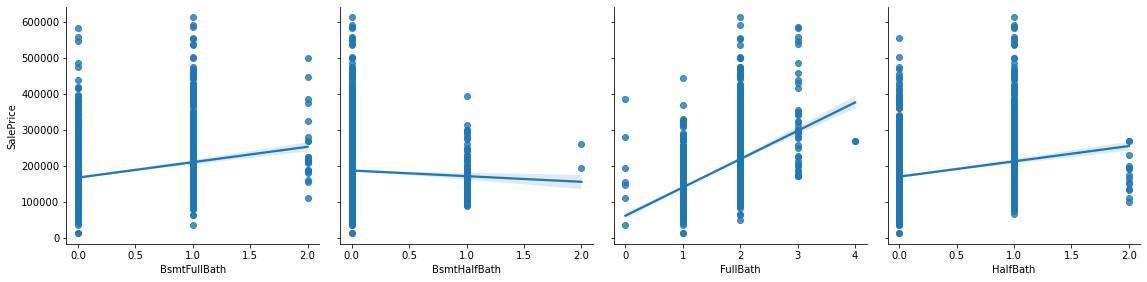

In [43]:
g = sns.PairGrid(numericals, y_vars=['SalePrice'], x_vars=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],height=4)
g.map(sns.regplot)

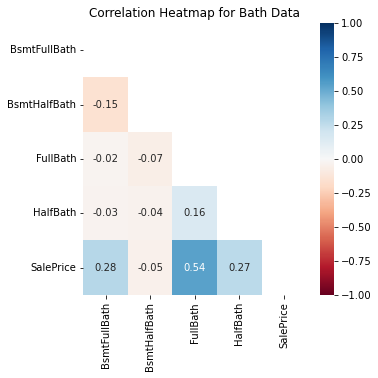

In [44]:
#Check correlation between each individual bath column vs sale price
corr = numericals[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','SalePrice']].corr()

fig = plt.figure(figsize=(5,5))
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr,annot=True, mask=mask,cmap="RdBu",fmt=".2f",
                 vmin = -1, vmax = 1,center=0)
ax.set_title("Correlation Heatmap for Bath Data");

**Notes**\
Findings: Only FullBath displays a fairly strong positive correlation with SalesPrice.\
Let's combine all the Baths into a column and check again.

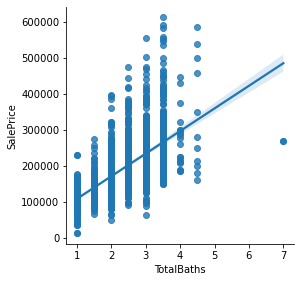

In [45]:
ames_train['TotalBaths'] = ames_train['BsmtFullBath']+ames_train['BsmtHalfBath']*0.5 +ames_train['FullBath']+ames_train['HalfBath']*0.5

g1 = sns.PairGrid(ames_train, y_vars=['SalePrice'], x_vars=['TotalBaths'],height=4)
g1.map(sns.regplot)



In [46]:
#Check correlation between TotalBaths vs SalePrice
corr1 = ames_train[['TotalBaths','SalePrice']].corr() # 0.6295

**Notes**\
Findings: The new variable TotalBaths gives a stronger correlation with SalesPrice than each individual column.\
Let's keep this new variable and drop the bath columns.

In [47]:
ames_train.drop(columns = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2050
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1914 non-null   int64  
 1   PID            1914 non-null   int64  
 2   MSSubClass     1914 non-null   int64  
 3   MSZoning       1914 non-null   object 
 4   LotArea        1914 non-null   int64  
 5   Alley          1914 non-null   object 
 6   LotShape       1914 non-null   int64  
 7   LandContour    1914 non-null   object 
 8   LotConfig      1914 non-null   object 
 9   Neighborhood   1914 non-null   object 
 10  Condition1     1914 non-null   object 
 11  BldgType       1914 non-null   object 
 12  HouseStyle     1914 non-null   object 
 13  OverallQual    1914 non-null   int64  
 14  OverallCond    1914 non-null   int64  
 15  YearBuilt      1914 non-null   int64  
 16  YearRemod/Add  1914 non-null   int64  
 17  RoofStyle      1914 non-null   object 
 18  Exterior

#### b) Creating Age column
Age column is created by subtracting "YearRemod/Add" from "YrSold".\
i.e subtract the year the house was built/remodelled in from the year it was sold in.

In [49]:
ames_train['Age'] = ames_train['YrSold'] - ames_train['YearRemod/Add']

corr_age_price = ames_train[['Age', 'SalePrice']].corr() #-0.54
display(corr_age_price)


,Age,SalePrice
Age,1.000000,-0.544641
SalePrice,-0.544641,1.000000


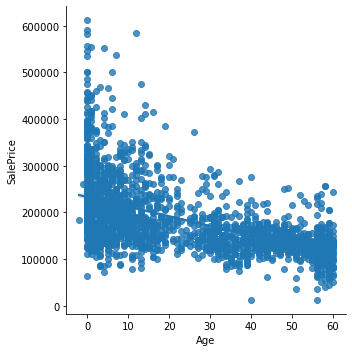

In [50]:
sns.lmplot(x='Age',y='SalePrice',data=ames_train)

**Notes**\
Findings: The new variable Age shows a moderate negative correlation with SalesPrice.\
This means that the younger the house, the higher the sale price.

In [51]:
ames_train.shape #(1914,66)

(1914, 66)

#### Data Cleaning Pt 2
#### a) Checking for intercorrelated features for numerical data and dropping columns with high colinearity with other features but low correlation to SalePrice

Intercorrelated features need to be dropped as they do not accurately aid in predicting sale price.\
Features with higher correlation to Sale price are retained while those with lower correlation to sale price are dropped.\
As a result, the following columns were dropped: "KitchenQual","BsmtQual","ExterQual","Age","GarageYrBlt","YearRemod/Add","BsmtFinType1","BsmtFinType2","1stFlrSF",\
"2ndFlrSF","TotRmsAbvGrd","Fireplaces","GarageArea".

In [52]:
#Subset all the numerical columns in the data set
numericals2 = ames_train.select_dtypes(include = [np.number])

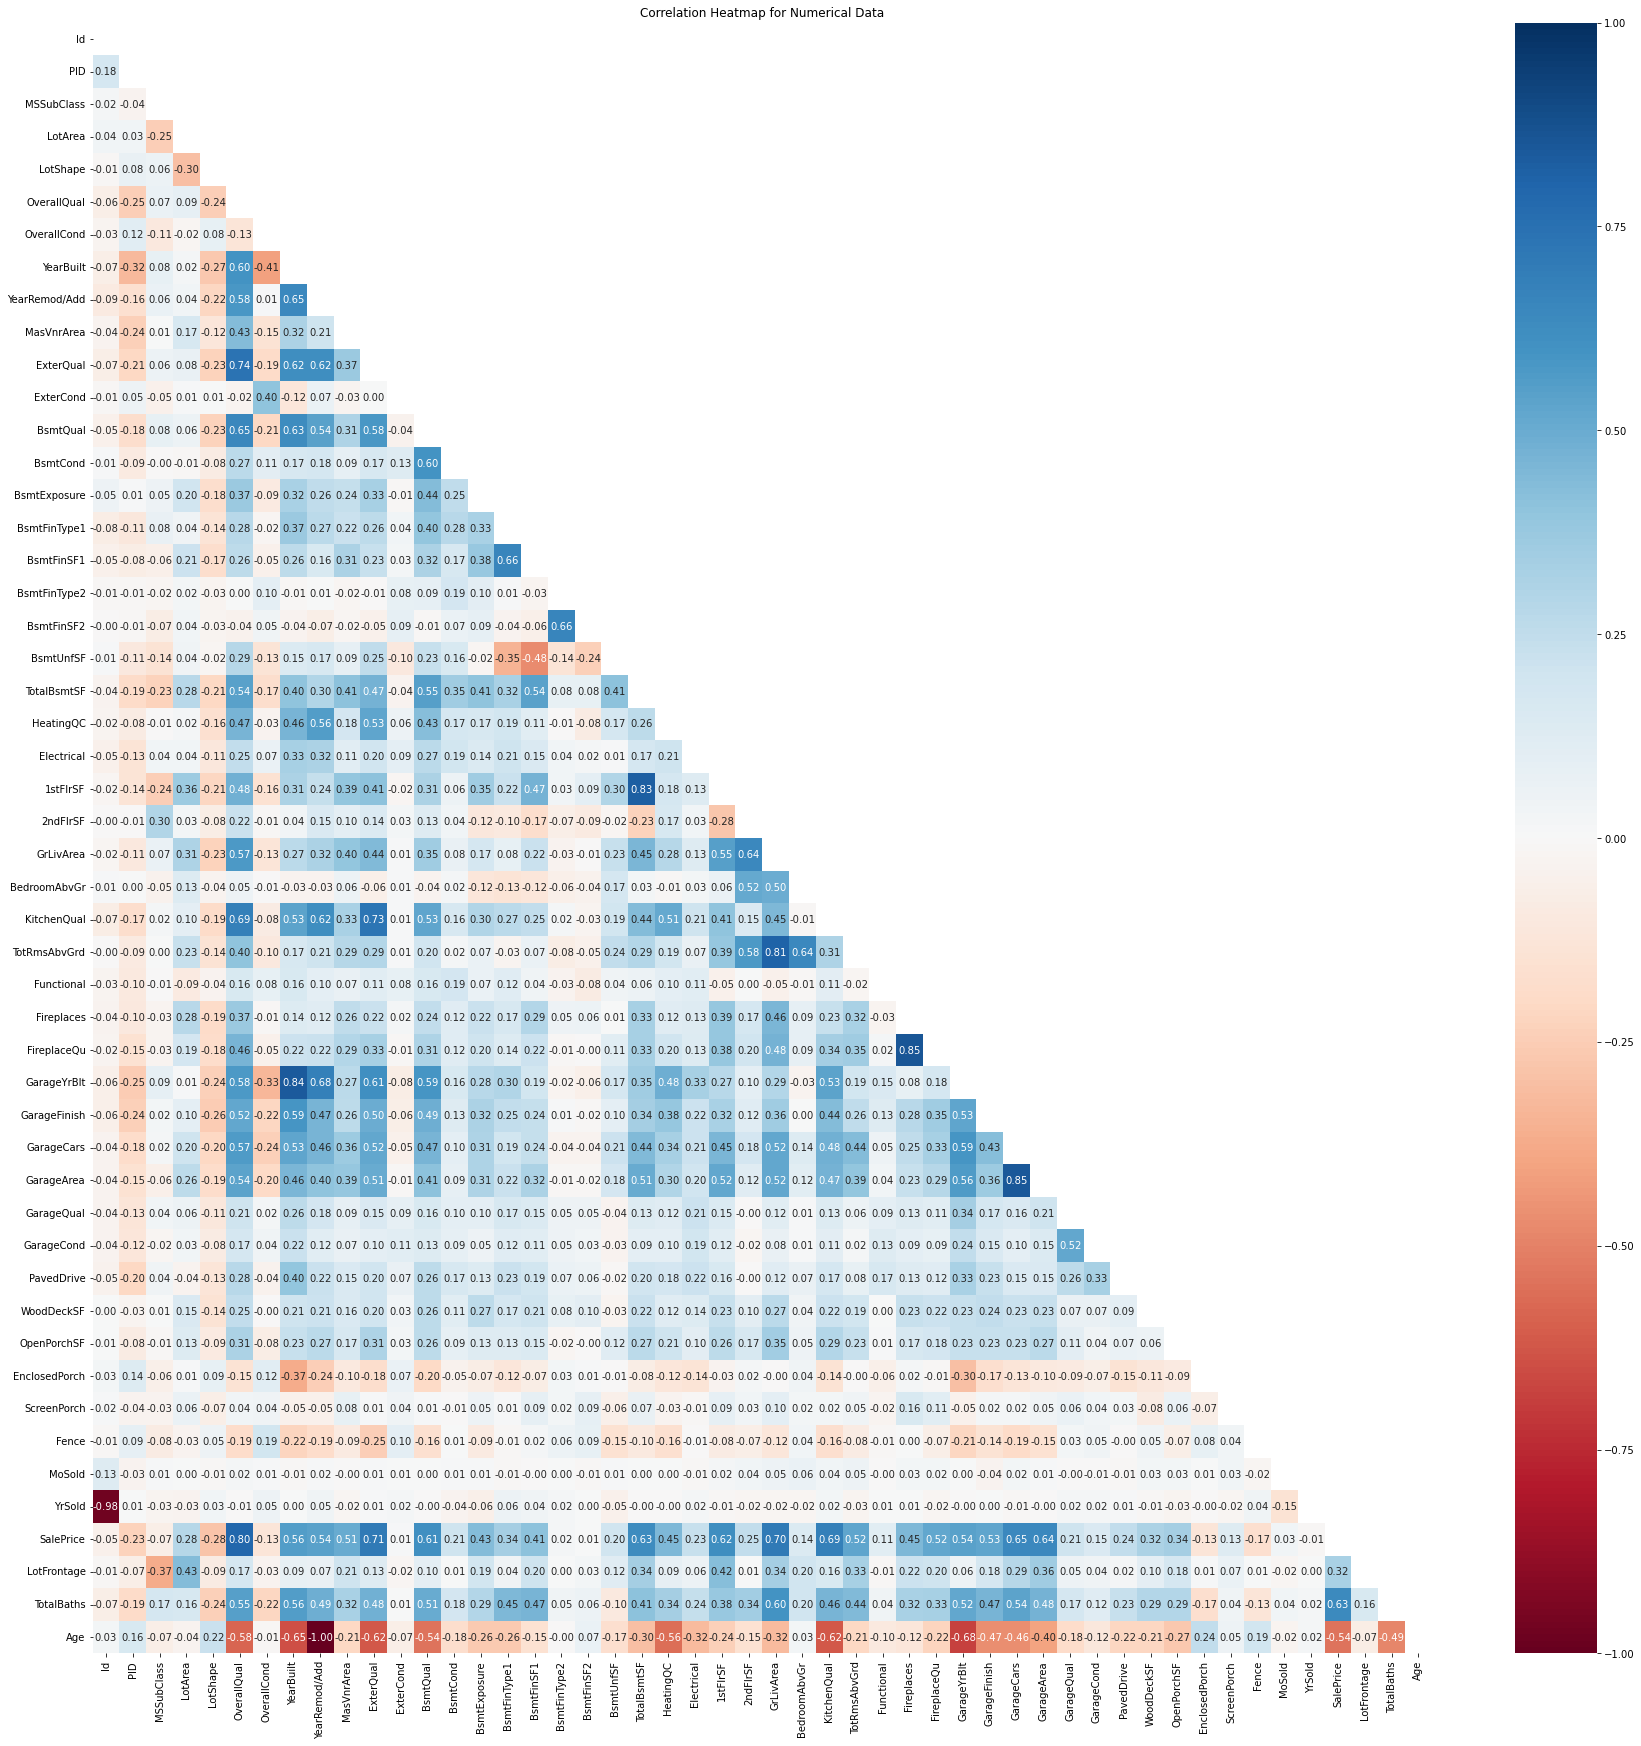

In [53]:
corr_num = numericals2.corr()
mask = np.triu(np.ones_like(corr_num, dtype=bool))

fig = plt.figure(figsize=(30,30))
ax = sns.heatmap(corr_num,annot=True, mask=mask,cmap="RdBu",fmt=".2f",
                 vmin = -1, vmax = 1,center=0)
ax.set_title("Correlation Heatmap for Numerical Data");

**Notes**\
Findings: We say that features are highly intercorrelated if |r| > 0.6

OverallQual - KitchenQual,BsmtQual,ExterQual\
YearBuilt - Age,GarageYrBlt,YearRemod/Add\
BsmtFinSF1 - BsmtFinType1\
BsmtFinSF2 - BsmtFinType2\
TotalBsmtSF - 1stFlrSF\
GrLivArea - 2ndFlrSF,TotRmsAbvGrd\
FireplaceQu - Fireplaces\
GarageCars - GarageArea

In [54]:
ames_train.drop(columns =["KitchenQual","BsmtQual","ExterQual",
                           "Age","GarageYrBlt","YearRemod/Add",
                           "BsmtFinType1","BsmtFinType2","1stFlrSF",
                           "2ndFlrSF","TotRmsAbvGrd","Fireplaces",
                           "GarageArea"],axis=1,inplace= True)

In [55]:
ames_train.shape #(1914,53) - 53 columns

(1914, 53)

#### b) Dropping outliers beyond 4std from continuous variables based on skew
Based on skewness, remove outliers more than 4 std for features that have a skewness of >=1.


In [56]:
numerical3 = ames_train.select_dtypes(include=[np.number])
ames_contin = numerical3[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                        'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                        'GrLivArea','WoodDeckSF','OpenPorchSF',
                        'EnclosedPorch','ScreenPorch','SalePrice']]
display(ames_contin)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.040848,13517,289.0,533.0,0.0,192.0,725.0,1479,0,44,0,0,130500
1,43.000000,11492,132.0,637.0,0.0,276.0,913.0,2122,0,74,0,0,220000
2,68.000000,7922,0.0,731.0,0.0,326.0,1057.0,1057,0,52,0,0,109000
3,73.000000,9802,0.0,0.0,0.0,384.0,384.0,1444,100,0,0,0,174000
4,82.000000,14235,0.0,0.0,0.0,676.0,676.0,1445,0,59,0,0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,79.000000,11449,0.0,1011.0,0.0,873.0,1884.0,1728,0,276,0,0,298751
2047,64.613615,12342,0.0,262.0,0.0,599.0,861.0,861,158,0,0,0,82500
2048,57.000000,7558,0.0,0.0,0.0,896.0,896.0,1913,0,0,0,0,177000
2049,80.000000,10400,0.0,155.0,750.0,295.0,1200.0,1200,0,189,140,0,144000


In [57]:
ames_contin.skew().sort_values(ascending=False)

LotArea          9.308964
BsmtFinSF2       4.119104
ScreenPorch      3.717597
EnclosedPorch    2.992270
MasVnrArea       2.520081
OpenPorchSF      2.234967
LotFrontage      2.146514
WoodDeckSF       1.986619
BsmtFinSF1       1.610339
SalePrice        1.598148
TotalBsmtSF      1.490656
GrLivArea        1.297578
BsmtUnfSF        0.934800
dtype: float64

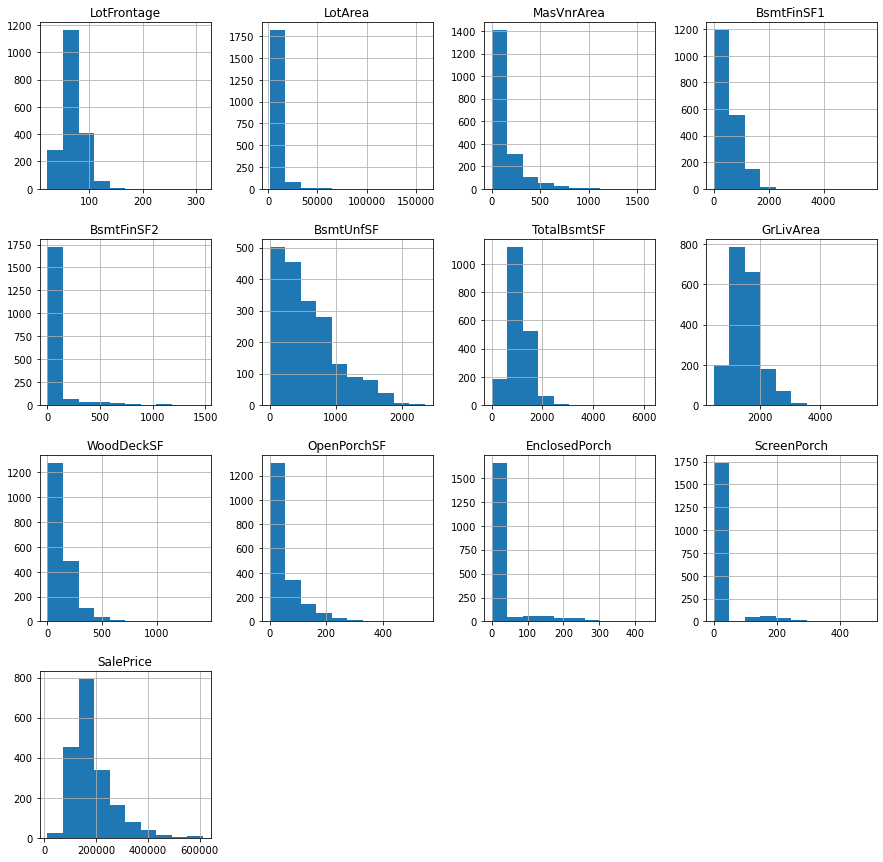

In [58]:
ames_contin.hist(figsize=(15,15))
plt.show()

In [65]:
contin_list = ames_contin.columns
#check to see how many data points are above or below 4 std from mean
total_outliers_above = 0
total_outliers_below = 0
for column in ames_train[contin_list]:
    skewness = ames_train[column].skew()
    if skewness >=1:
        max_skew = ames_train[column].mean()+ 4*np.std(ames_train[column])
        min_skew = ames_train[column].mean()- 4*np.std(ames_train[column])
        pts_above_max = ames_train[column][(ames_train[column]> max_skew)].count()
        pts_below_min = ames_train[column][(ames_train[column]< min_skew)].count()
        total_outliers_above += pts_above_max
        total_outliers_below += pts_below_min
        
        print(column,'-- Skewness:',round(skewness,2),'Outliers Above:',pts_above_max,'Outliers Below:',pts_below_min)
        
print('Total Outliers:',total_outliers_above)
#We can see that there are 0 data points 4std below mean

LotFrontage -- Skewness: 2.15 Outliers Above: 7 Outliers Below: 0
LotArea -- Skewness: 9.31 Outliers Above: 18 Outliers Below: 0
MasVnrArea -- Skewness: 2.52 Outliers Above: 16 Outliers Below: 0
BsmtFinSF1 -- Skewness: 1.61 Outliers Above: 2 Outliers Below: 0
BsmtFinSF2 -- Skewness: 4.12 Outliers Above: 35 Outliers Below: 0
TotalBsmtSF -- Skewness: 1.49 Outliers Above: 5 Outliers Below: 0
GrLivArea -- Skewness: 1.3 Outliers Above: 6 Outliers Below: 0
WoodDeckSF -- Skewness: 1.99 Outliers Above: 12 Outliers Below: 0
OpenPorchSF -- Skewness: 2.23 Outliers Above: 14 Outliers Below: 0
EnclosedPorch -- Skewness: 2.99 Outliers Above: 23 Outliers Below: 0
ScreenPorch -- Skewness: 3.72 Outliers Above: 27 Outliers Below: 0
SalePrice -- Skewness: 1.6 Outliers Above: 11 Outliers Below: 0
Total Outliers: 176


In [66]:
#set up new data fram ames_rem with Lot Area filtered
max_skew_lotarea = ames_train['LotArea'].mean()+ 4*np.std(ames_train['LotArea'])
ames_rem = ames_train[(ames_train['LotArea'] < max_skew_lotarea)]

#Get list of continuous variables, excluding LotArea
ames_contin_update = ames_contin.drop(columns = 'LotArea',axis = 1)
ames_contin_update_col = ames_contin_update.columns

#Filter for values less than the max_skew
for column in ames_rem[ames_contin_update_col]:
    max_skew = ames_train[column].mean()+ 4*np.std(ames_train[column])
    ames_rem = ames_rem[(ames_rem[column] < max_skew)]
ames_rem


,Id,PID,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SalePrice,LotFrontage,TotalBaths
0,109,533352170,60,RL,13517,None,3,Lvl,CulDSac,Sawyer,RRAe,1Fam,2Story,6,8,1976,Gable,HdBoard,Plywood,BrkFace,289.0,3,CBlock,3.0,1.0,533.0,0.0,192.0,725.0,5,Y,5,1479,3,8,0.0,Attchd,2.0,2.0,3.0,3.0,3,0,44,0,0,0.0,3,2010,WD,130500,65.040848,2.5
1,544,531379050,60,RL,11492,None,3,Lvl,CulDSac,SawyerW,Norm,1Fam,2Story,7,5,1996,Gable,VinylSd,VinylSd,BrkFace,132.0,3,PConc,3.0,1.0,637.0,0.0,276.0,913.0,5,Y,5,2122,4,8,3.0,Attchd,2.0,2.0,3.0,3.0,3,0,74,0,0,0.0,4,2009,WD,220000,43.000000,3.5
2,153,535304180,20,RL,7922,None,4,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,7,1953,Gable,VinylSd,VinylSd,None,0.0,4,CBlock,3.0,1.0,731.0,0.0,326.0,1057.0,3,Y,5,1057,3,8,0.0,Detchd,1.0,1.0,3.0,3.0,3,0,52,0,0,0.0,1,2010,WD,109000,68.000000,2.0
3,318,916386060,60,RL,9802,None,4,Lvl,Inside,Timber,Norm,1Fam,2Story,5,5,2006,Gable,VinylSd,VinylSd,None,0.0,3,PConc,3.0,1.0,0.0,0.0,384.0,384.0,4,Y,5,1444,3,8,0.0,BuiltIn,3.0,2.0,3.0,3.0,3,100,0,0,0,0.0,4,2010,WD,174000,73.000000,2.5
4,255,906425045,50,RL,14235,None,3,Lvl,Inside,SawyerW,Norm,1Fam,1.5Fin,6,8,1900,Gable,Wd Sdng,Plywood,None,0.0,3,PConc,4.0,1.0,0.0,0.0,676.0,676.0,3,Y,5,1445,3,8,0.0,Detchd,1.0,2.0,3.0,3.0,1,0,59,0,0,0.0,3,2010,WD,138500,82.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,1051,528102030,20,RL,12444,None,4,Lvl,FR2,NridgHt,Norm,1Fam,1Story,8,5,2008,Hip,VinylSd,VinylSd,Stone,426.0,3,PConc,3.0,3.0,1336.0,0.0,596.0,1932.0,5,Y,5,1932,2,8,4.0,Attchd,3.0,3.0,3.0,3.0,3,0,66,0,0,0.0,11,2008,New,394617,96.000000,3.0
2046,1587,921126030,20,RL,11449,None,3,HLS,Inside,Timber,Norm,1Fam,1Story,8,5,2007,Gable,VinylSd,VinylSd,None,0.0,3,PConc,3.0,3.0,1011.0,0.0,873.0,1884.0,5,Y,5,1728,3,8,4.0,Attchd,3.0,2.0,3.0,3.0,3,0,276,0,0,0.0,1,2008,WD,298751,79.000000,3.0
2047,785,905377130,30,RL,12342,None,3,Lvl,Inside,Edwards,Norm,1Fam,1Story,4,5,1940,Gable,VinylSd,VinylSd,None,0.0,3,CBlock,3.0,1.0,262.0,0.0,599.0,861.0,5,Y,5,861,1,8,0.0,Detchd,1.0,2.0,3.0,3.0,3,158,0,0,0,0.0,3,2009,WD,82500,64.613615,1.0
2048,916,909253010,50,RL,7558,None,4,Bnk,Inside,Crawfor,Norm,1Fam,1.5Fin,6,6,1928,Gable,BrkFace,Stone,None,0.0,3,BrkTil,3.0,1.0,0.0,0.0,896.0,896.0,4,Y,5,1913,3,8,3.0,Detchd,1.0,2.0,2.0,2.0,3,0,0,0,0,0.0,3,2009,WD,177000,57.000000,1.5


In [67]:
ames_rem.shape #(1767, 53)

(1767, 53)

In [68]:
ames_rem.skew().sort_values(ascending=False)

/var/folders/p8/pmh0_t595xs6cggdw69wzg9r0000gn/T/ipykernel_19570/3242242563.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ames_rem.skew().sort_values(ascending=False)


BsmtFinSF2       3.929702
ScreenPorch      3.489964
EnclosedPorch    2.866408
MasVnrArea       1.841528
Fence            1.769122
OpenPorchSF      1.630537
ExterCond        1.549681
MSSubClass       1.326791
SalePrice        1.217450
WoodDeckSF       1.192639
BsmtExposure     1.170301
LotArea          1.048628
BsmtUnfSF        0.917622
OverallCond      0.855933
GrLivArea        0.742376
BsmtFinSF1       0.688805
TotalBaths       0.365938
GarageFinish     0.363410
LotFrontage      0.362987
GarageCars       0.332639
BedroomAbvGr     0.219860
MoSold           0.207211
TotalBsmtSF      0.197506
FireplaceQu      0.163922
YrSold           0.138564
PID              0.113130
OverallQual      0.102586
Id               0.008918
HeatingQC       -0.605263
YearBuilt       -0.637430
LotShape        -1.192481
GarageQual      -2.098692
GarageCond      -3.382411
BsmtCond        -3.601133
PavedDrive      -3.626575
Electrical      -4.355584
Functional      -5.798460
dtype: float64

#### c) Dummify nominal columns

In [69]:
ames_rem = pd.get_dummies(ames_rem,
                                columns = ["MSSubClass","MSZoning","Alley",
                                   "LandContour","LotConfig","Neighborhood",
                                   "Condition1","BldgType","HouseStyle",
                                   "RoofStyle","Exterior1st","Exterior2nd",
                                   "MasVnrType","Foundation","CentralAir",
                                   "GarageType","SaleType"])

In [70]:
ames_rem.shape

(1767, 183)

#### d) Dropping ID and PID column

In [71]:
ames_rem.drop(columns = ['Id',"PID"],axis=1,inplace=True)

In [72]:
ames_rem.shape

(1767, 181)

#### e) Save new csv

In [73]:
ames_rem.to_csv("ames_rem.csv", index = False)